In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ml_help
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from time import time
sns.set_theme()

# Load data

In [2]:
df = pd.read_csv("./data/gardiner_count_incidents.csv.zip")
df

volume_15min  number_of_lanes  dist_from_mid_point  magnitudeOfDelay  \
0              160.0              3.0             4.887837               0.0   
1              170.0              3.0             0.474912               0.0   
2              169.0              3.0            -0.635254               0.0   
3              123.0              3.0            -0.633557               0.0   
4              134.0              3.0            -7.665465               0.0   
...              ...              ...                  ...               ...   
145236          98.0              3.0            -7.668009               0.0   
145237         439.0              3.0             0.474912               0.0   
145238         243.0              3.0             0.474912               0.0   
145239         365.0              5.0            -1.750579               0.0   
145240         186.0              3.0            -7.665465               0.0   

        length  delay   day  hour  minute  direction_E  ...  month_10  \
0          0.0    0.0  11.0  15.0     0.0          0.0  ...       0.0   
1          0.0    0.0  11.0  15.0     0.0          1.0  ...       0.0   
2          0.0    0.0  11.0  15.0     0.0          1.0  ...       0.0   
3          0.0    0.0  11.0  15.0     0.0          0.0  ...       0.0   
4          0.0    0.0  11.0  15.0     0.0          0.0  ...       0.0   
...        ...    ...   ...   ...     ...          ...  ...       ...   
145236     0.0    0.0   1.0   5.0    15.0          1.0  ...       0.0   
145237     0.0    0.0   1.0   5.0    15.0          0.0  ...       0.0   
145238     0.0    0.0   1.0   5.0    15.0          1.0  ...       0.0   
145239     0.0    0.0   1.0   5.0    15.0          0.0  ...       0.0   
145240     0.0    0.0   1.0   5.0    15.0          0.0  ...       0.0   

        month_11  month_12  day_of_week_0  day_of_week_1  day_of_week_2  \
0            0.0       0.0            0.0            0.0            0.0   
1            0.0       0.0            0.0            0.0            0.0   
2            0.0       0.0            0.0            0.0            0.0   
3            0.0       0.0            0.0            0.0            0.0   
4            0.0       0.0            0.0            0.0            0.0   
...          ...       ...            ...            ...            ...   
145236       0.0       0.0            0.0            0.0            0.0   
145237       0.0       0.0            0.0            0.0            0.0   
145238       0.0       0.0            0.0            0.0            0.0   
145239       0.0       0.0            0.0            0.0            0.0   
145240       0.0       0.0            0.0            0.0            0.0   

        day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  
0                 1.0            0.0            0.0            0.0  
1                 1.0            0.0            0.0            0.0  
2                 1.0            0.0            0.0            0.0  
3                 1.0            0.0            0.0            0.0  
4                 1.0            0.0            0.0            0.0  
...               ...            ...            ...            ...  
145236            0.0            0.0            0.0            1.0  
145237            0.0            0.0            0.0            1.0  
145238            0.0            0.0            0.0            1.0  
145239            0.0            0.0            0.0            1.0  
145240            0.0            0.0            0.0            1.0  

[145241 rows x 35 columns]

In [3]:
X = df.drop("volume_15min",axis=1)
y = df["volume_15min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
metrics = pd.read_csv("./metrics/094_best_metrics.csv.zip")
metrics

model        r2         mae           mse        rmse  \
0        XGBoost  0.966297   49.646901   5255.814172   72.496994   
1            MLP  0.923800   74.811658  11882.957548  109.008979   
2  Random Forest  0.844833  113.435364  24197.283451  155.554760   
3  Decision Tree  0.836164  115.957231  25549.293988  159.841465   

           mape  time_to_fit  time_to_predict  
0  2.345714e+15    12.480480         0.100620  
1  3.952443e+15   370.095582         0.081928  
2  4.951081e+15    14.194492         0.128986  
3  5.104655e+15     0.231845         0.004971

# Load models

## XGBoost

### Run CV

In [5]:
import xgboost as xgb

params = ml_help.params_to_dict("093_xgboost")

In [6]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

xgb_cv_metrics = ml_help.run_stratified_kfold("XGBoost",xgboost_pipeline,X_train,y_train)
xgb_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 12.035237312316895 seconds to fit!
Running fold 1...
Fold 1 took 11.772115468978882 seconds to fit!
Running fold 2...
Fold 2 took 11.549987077713013 seconds to fit!
Running fold 3...
Fold 3 took 11.726083040237427 seconds to fit!
Running fold 4...
Fold 4 took 11.75840163230896 seconds to fit!
Running fold 5...
Fold 5 took 11.677178382873535 seconds to fit!
Running fold 6...
Fold 6 took 11.632933139801025 seconds to fit!
Running fold 7...
Fold 7 took 11.922427415847778 seconds to fit!
Running fold 8...
Fold 8 took 11.748274803161621 seconds to fit!
Running fold 9...
Fold 9 took 11.666487455368042 seconds to fit!


{'model': 'XGBoost',
 'r2': 0.9674246891336585,
 'mae': 48.3104989790595,
 'mape': 2175794239839771.2,
 'mse': 5027.771669649878,
 'rmse': 70.88932357698458,
 'time_to_fit': 11.748912572860718}

### Test using previously unseen data

In [7]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

start = time()
pipe = xgboost_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

xgb_metrics = ml_help.get_metrics_reg("XGBoost",y_test,y_pred)
xgb_metrics["time_to_fit"] = end-start
xgb_metrics

{'model': 'XGBoost',
 'r2': 0.9695566166426219,
 'mae': 47.29308939815827,
 'mse': 4698.759132401582,
 'rmse': 68.5474954495172,
 'mape': 1447822566129383.0,
 'time_to_fit': 12.143715858459473}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


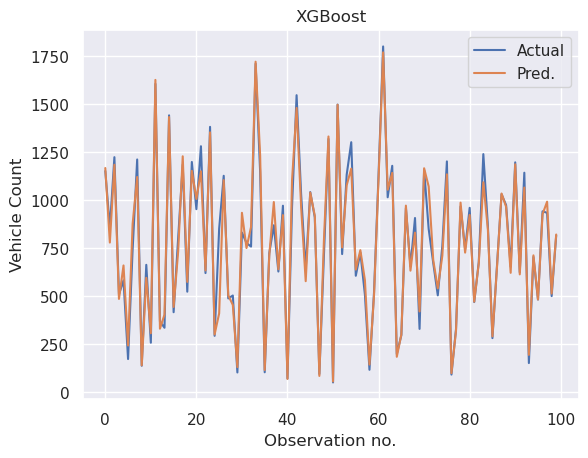

In [8]:
ml_help.plot_prediction(y_test, y_pred, "XGBoost", "Vehicle Count", "095_xgboost_predictions")

## Random Forest

### Run CV

In [9]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("093_random_forest")

In [10]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params,n_jobs=-1))

random_forest_cv_metrics = ml_help.run_stratified_kfold("Random Forest",random_forest_pipeline,X_train,y_train)
random_forest_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 3.766284465789795 seconds to fit!
Running fold 1...
Fold 1 took 3.7513010501861572 seconds to fit!
Running fold 2...
Fold 2 took 3.7827401161193848 seconds to fit!
Running fold 3...
Fold 3 took 3.7757551670074463 seconds to fit!
Running fold 4...
Fold 4 took 3.7523016929626465 seconds to fit!
Running fold 5...
Fold 5 took 3.810120105743408 seconds to fit!
Running fold 6...
Fold 6 took 3.758234977722168 seconds to fit!
Running fold 7...
Fold 7 took 3.7847766876220703 seconds to fit!
Running fold 8...
Fold 8 took 3.7845635414123535 seconds to fit!
Running fold 9...
Fold 9 took 3.7792861461639404 seconds to fit!


{'model': 'Random Forest',
 'r2': 0.8441637692925015,
 'mae': 113.45360498768969,
 'mape': 4961459328216776.0,
 'mse': 24053.827581364643,
 'rmse': 155.08791953515325,
 'time_to_fit': 3.774536395072937}

### Test using previously unseen data

In [11]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params))

start = time()
pipe = random_forest_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

random_forest_metrics = ml_help.get_metrics_reg("Random Forest",y_test,y_pred)
random_forest_metrics["time_to_fit"] = end-start
random_forest_metrics

{'model': 'Random Forest',
 'r2': 0.8474861315820135,
 'mae': 111.91361169631945,
 'mse': 23539.628418903394,
 'rmse': 153.4262963735467,
 'mape': 4015220148628041.5,
 'time_to_fit': 19.2727108001709}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


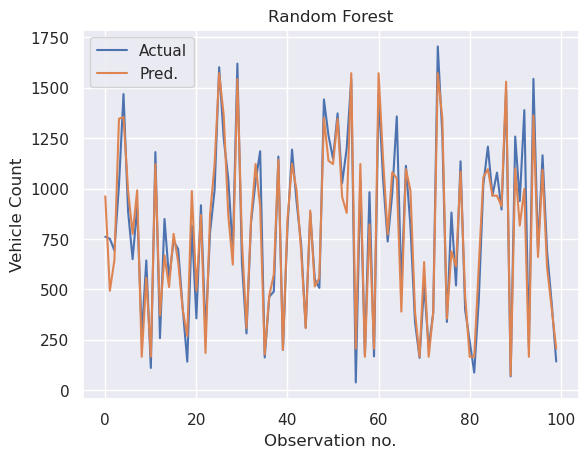

In [12]:
ml_help.plot_prediction(y_test, y_pred, "Random Forest", "Vehicle Count", "095_random_forest_predictions")

## Decision Tree

### Run CV

In [13]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("093_decision_tree")

In [14]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

dtr_cv_metrics = ml_help.run_stratified_kfold("Decision Tree",decision_tree_pipeline,X_train,y_train)
dtr_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 0.2839686870574951 seconds to fit!
Running fold 1...
Fold 1 took 0.28546619415283203 seconds to fit!
Running fold 2...
Fold 2 took 0.28838348388671875 seconds to fit!
Running fold 3...
Fold 3 took 0.2853405475616455 seconds to fit!
Running fold 4...
Fold 4 took 0.2860434055328369 seconds to fit!
Running fold 5...
Fold 5 took 0.28354668617248535 seconds to fit!
Running fold 6...
Fold 6 took 0.2921433448791504 seconds to fit!
Running fold 7...
Fold 7 took 0.2898528575897217 seconds to fit!
Running fold 8...
Fold 8 took 0.28781867027282715 seconds to fit!
Running fold 9...
Fold 9 took 0.28023338317871094 seconds to fit!


{'model': 'Decision Tree',
 'r2': 0.8362032199945701,
 'mae': 115.76074591888035,
 'mape': 5072703506925556.0,
 'mse': 25282.455702644555,
 'rmse': 158.9983217521508,
 'time_to_fit': 0.28627972602844237}

### Test using previously unseen data

In [15]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

start = time()
pipe = decision_tree_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

dtr_metrics = ml_help.get_metrics_reg("Decision Tree",y_test,y_pred)
dtr_metrics["time_to_fit"] = end-start
dtr_metrics

{'model': 'Decision Tree',
 'r2': 0.839334142983629,
 'mae': 114.0897772674447,
 'mse': 24797.840439040443,
 'rmse': 157.47330071805965,
 'mape': 4073598625483593.5,
 'time_to_fit': 0.33455586433410645}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


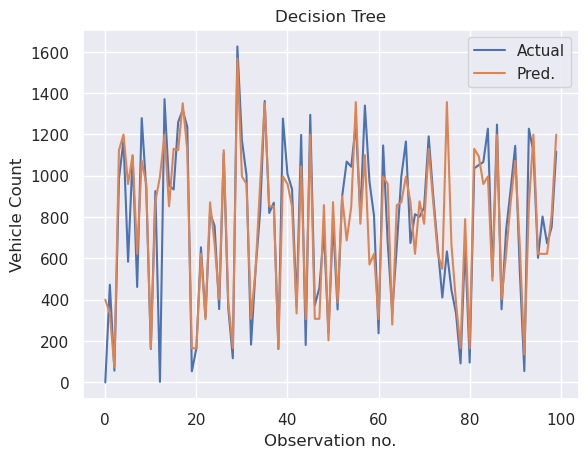

In [16]:
ml_help.plot_prediction(y_test, y_pred, "Decision Tree", "Vehicle Count", "095_decision_tree_predictions")

## MLP

### Run CV

In [17]:
from sklearn.neural_network import MLPRegressor

params = ml_help.params_to_dict("093_mlpr")

In [18]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

mlp_cv_metrics = ml_help.run_stratified_kfold("MLP",mlp_pipeline,X_train,y_train)
mlp_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 0 took 579.3023223876953 seconds to fit!
Running fold 1...
Fold 1 took 374.6156620979309 seconds to fit!
Running fold 2...
Fold 2 took 572.6366519927979 seconds to fit!
Running fold 3...
Fold 3 took 172.47431421279907 seconds to fit!
Running fold 4...
Fold 4 took 218.4818983078003 seconds to fit!
Running fold 5...
Fold 5 took 436.83027625083923 seconds to fit!
Running fold 6...
Fold 6 took 464.5436110496521 seconds to fit!
Running fold 7...
Fold 7 took 464.37406635284424 seconds to fit!
Running fold 8...
Fold 8 took 486.0052981376648 seconds to fit!
Running fold 9...
Fold 9 took 352.0851242542267 seconds to fit!


{'model': 'MLP',
 'r2': 0.9287598174088357,
 'mae': 71.56305331497181,
 'mape': 3608601589152610.5,
 'mse': 10995.620114366366,
 'rmse': 104.70805366648071,
 'time_to_fit': 412.13492250442505}

### Test using previously unseen data

In [19]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

start = time()
pipe = mlp_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

mlp_metrics = ml_help.get_metrics_reg("MLP",y_test,y_pred)
mlp_metrics["time_to_fit"] = end-start
mlp_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(


{'model': 'MLP',
 'r2': 0.9380529210446977,
 'mae': 68.0928772854297,
 'mse': 9561.171291307395,
 'rmse': 97.78124202170575,
 'mape': 2353273165820032.0,
 'time_to_fit': 648.2626304626465}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


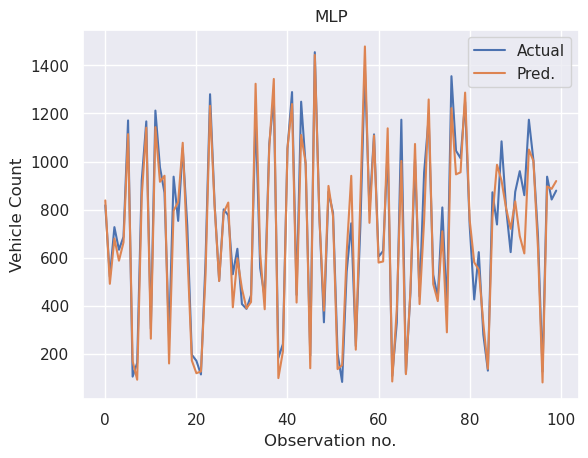

In [20]:
ml_help.plot_prediction(y_test, y_pred, "MLP", "Vehicle Count", "095_mlp_predictions")

# Store metrics

In [21]:
metrics_cv = pd.concat([pd.DataFrame(xgb_cv_metrics,index=[0]),pd.DataFrame(random_forest_cv_metrics,index=[0]),pd.DataFrame(dtr_cv_metrics,index=[0]),pd.DataFrame(mlp_cv_metrics,index=[0])])
metrics_cv.to_csv("./metrics/095_gardiner_count_incidents_cv_metrics.csv.zip",index=False,compression="zip")

metrics = pd.concat([pd.DataFrame(xgb_metrics,index=[0]),pd.DataFrame(random_forest_metrics,index=[0]),pd.DataFrame(dtr_metrics,index=[0]),pd.DataFrame(mlp_metrics,index=[0])])
metrics.to_csv("./metrics/095_gardiner_count_incidents_metrics.csv.zip",index=False,compression="zip")

# Print CV metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


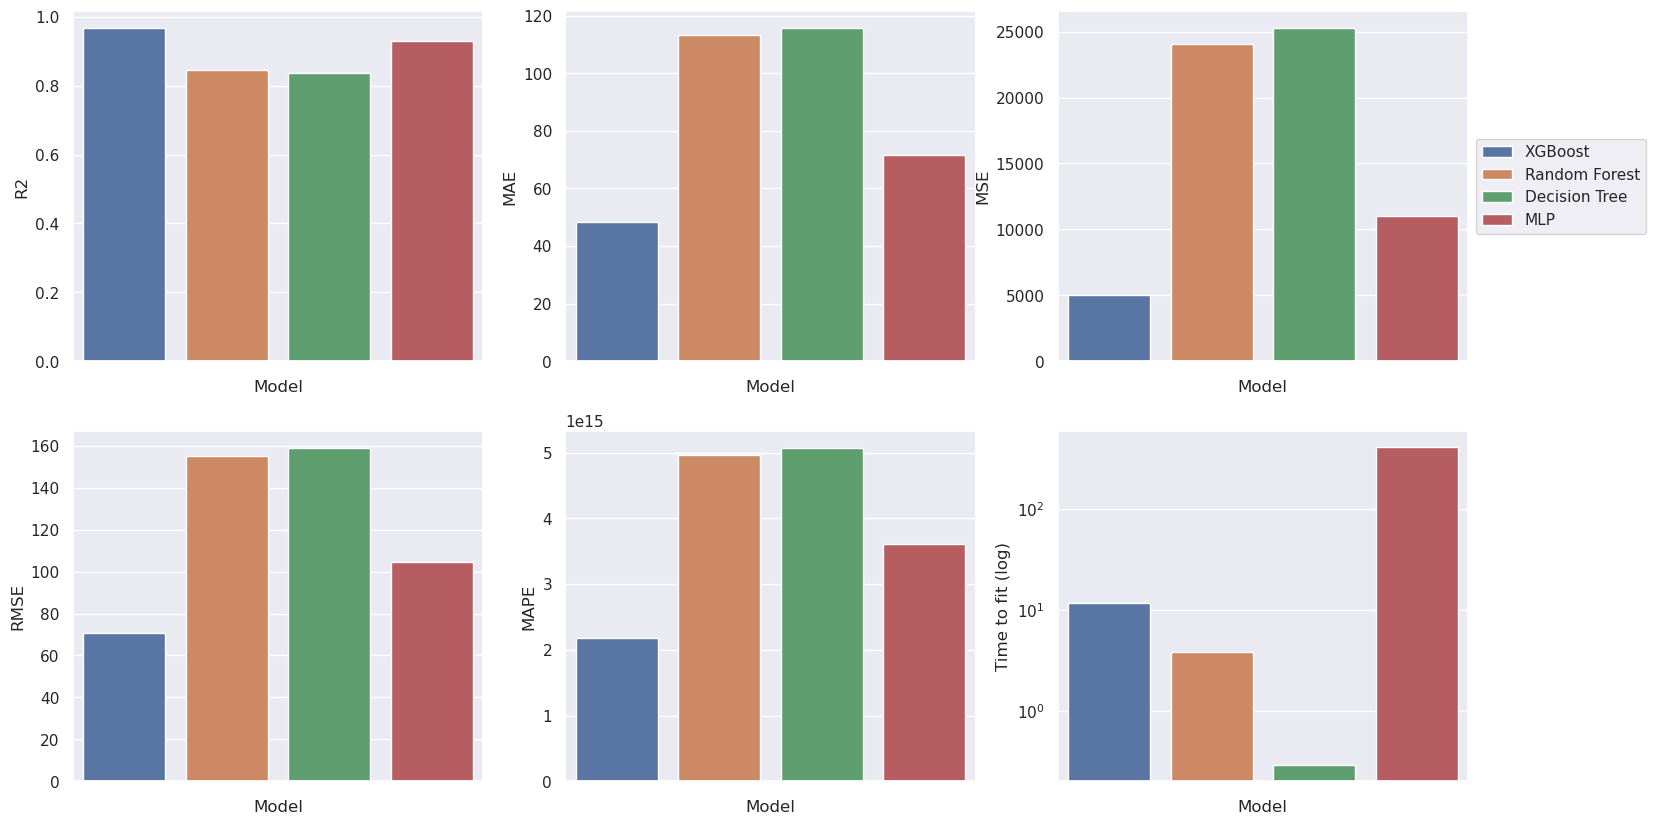

In [22]:
sns.set_theme()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics_cv, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics_cv, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics_cv, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics_cv, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics_cv, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics_cv, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/095_gardiner_count_incidents_cv_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/095_gardiner_count_incidents_cv_metrics.png",bbox_inches="tight")

# Print metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


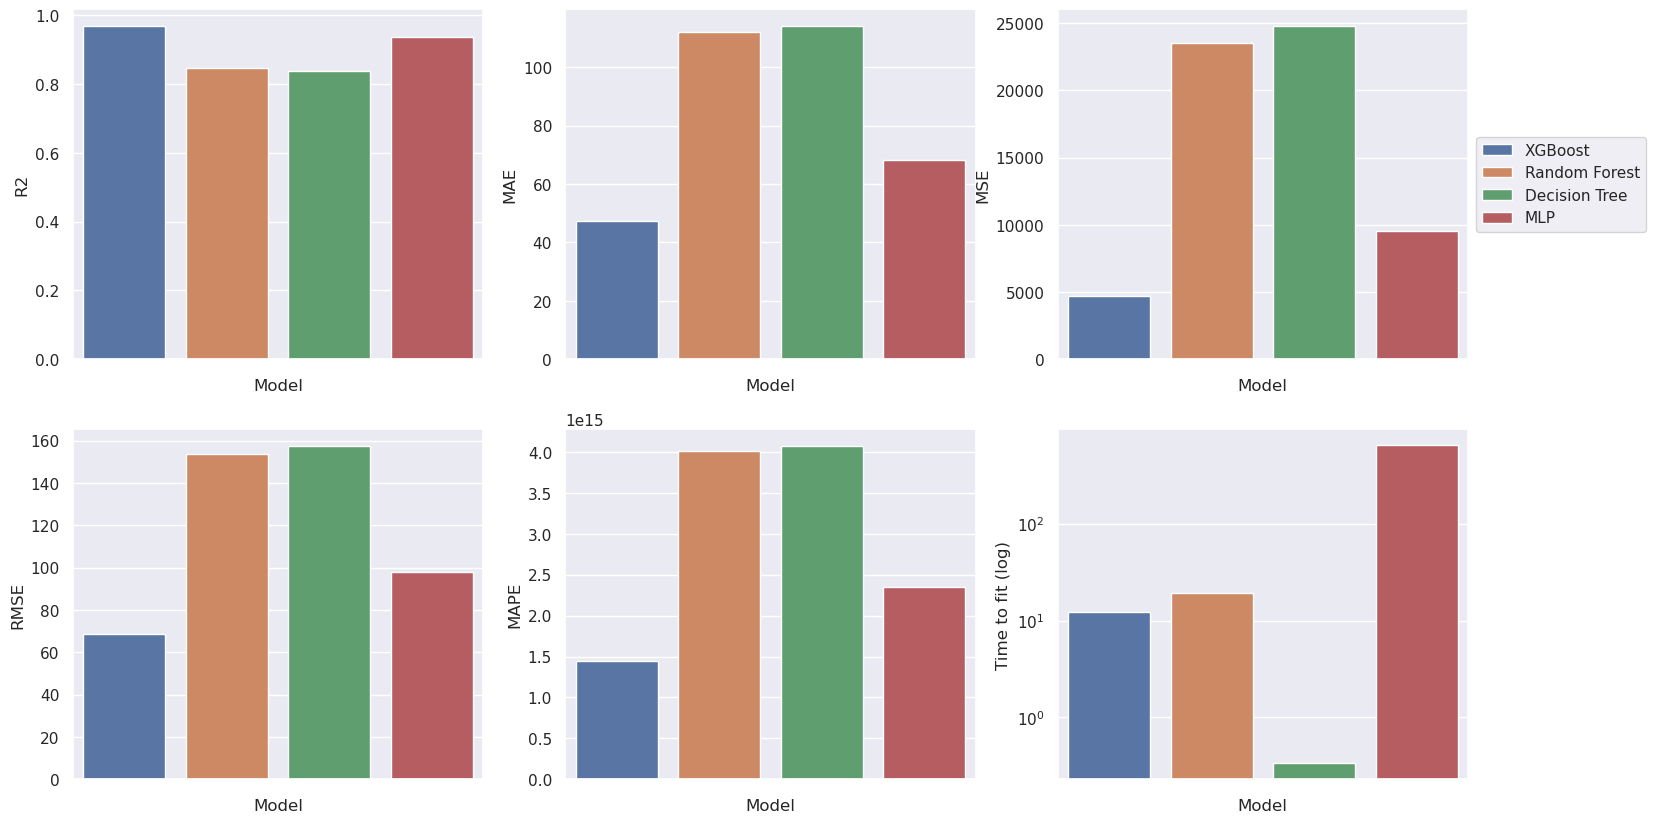

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/095_gardiner_count_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/095_gardiner_count_incidents_metrics.png",bbox_inches="tight")